# Manchester United EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
pd.set_option('display.max_rows', None)
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import HTML,display,display_html

In [2]:
df = pd.read_csv(r'data/FIFA-21 Complete.csv',sep=';', index_col='player_id')
# in the FIFA21 player database, the team names had a space at the end: truncated.
df['team'] = df['team'].str.rstrip()

### Let's look at the raw FIFA stats first and see how Manchester United compares to other clubs in the world and especially their PL rivals.

## Intro: Basic comparisons between top European teams

In [3]:
team_stat = df.groupby(['team'])['overall'].mean().sort_values(ascending=False)
team_stat.head(15).to_frame().style.background_gradient(cmap="magma")

,overall
team,
Juventus,83.043478
FC Bayern München,81.565217
Napoli,79.730769
Real Madrid,79.606061
Paris Saint-Germain,78.866667
Inter,78.576923
FC Barcelona,78.090909
Bayer 04 Leverkusen,77.916667
Manchester City,76.875000


### Manchester United ranks 15th in the world, by mean FIFA21 overall stats;
### Man City and Liverpool are the only PL clubs with higher mean overall stats


In [4]:
best_itw=df.loc[df['overall'] > 84 ].sort_values(by = ['overall'],ascending=False)
best_itw['team'].value_counts().head(15).to_frame().style.background_gradient(cmap="twilight")

,team
FC Barcelona,12
Manchester City,11
Real Madrid,11
Liverpool,10
Paris Saint-Germain,9
Juventus,8
FC Bayern München,8
Inter,6
Tottenham Hotspur,5
Borussia Dortmund,5


### It is commonly accepted by FIFA fans that world class players have at least a 85 overall rating.  By this popular metric, Manchester United has only 3 world class players, less than Man City's 11, Liverpool's 10, and even Tottenham's 5.

## A Look inside Average League Positions for the past decade

In [7]:
# Average Position Analysis
# Data pulled from Wikipedia
# (not many sites and data sources keep track of teams' mid-season league positions)
links = ["https://en.wikipedia.org/wiki/2009%E2%80%9310_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2010%E2%80%9311_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2011%E2%80%9312_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2012%E2%80%9313_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2013%E2%80%9314_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2014%E2%80%9315_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2015%E2%80%9316_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2016%E2%80%9317_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2017%E2%80%9318_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2018%E2%80%9319_Manchester_United_F.C._season","https://en.wikipedia.org/wiki/2019%E2%80%9320_Manchester_United_F.C._season"]
league_pos = []

def league_pos_extractor(link,league):
    manu_df = pd.read_html(link)
    if len(manu_df[4]) ==38:
        positions = manu_df[4].iloc[:,-1].values.tolist()
    elif link == "https://en.wikipedia.org/wiki/2018%E2%80%9319_Manchester_United_F.C._season":
        positions = manu_df[3].iloc[:,-2].values.tolist()
    else:
        positions = manu_df[3].iloc[:,-1].values.tolist()
    league.append(positions)

for link in links:
    league_pos_extractor(link,league_pos)
agg_lg_pos = pd.DataFrame(league_pos)

df2 = agg_lg_pos.T
df2.columns = ["09/10","10/11","11/12","12/13","13/14","14/15","15/16","16/17","17/18","18/19","19/20"]

for col in df2:
    if col == "15/16":
        df2[col] = df2[col].str[0]
    else:
        df2[col] = df2[col].str[:-2]
    df2[col] = pd.to_numeric(df2[col])

df2.index = range(1,39)

avg_pos = []

for col in df2:
    avg_pos.append((np.mean(df2[col])))

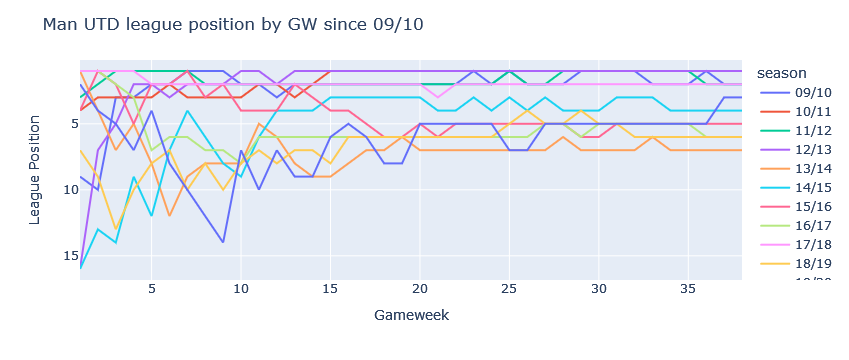

In [9]:
pd.options.plotting.backend = "plotly"

fig = df2.plot(labels = dict(index="Gameweek",value="League Position",variable="season",line_shape="hv"))
fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(title='Man UTD league position by GW since 09/10')
fig.show(include_plotlyjs=False,output_type='div')

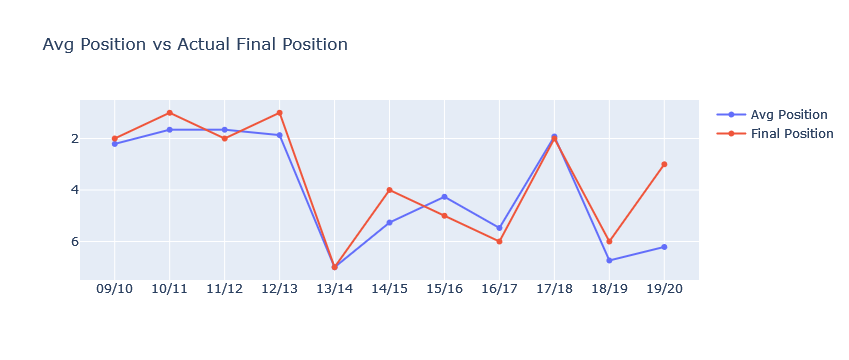

In [10]:
years = df2.columns

# fig2 = go.Figure(data=[go.Table(header=dict(values=['Season','Average Position', 'Final Position']),
#                  cells=dict(values=[df2.columns,avg_pos, [2,1,2,1,7,4,5,6,2,6,3]]))
#                      ])

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=years, y=avg_pos,
                    mode='lines+markers',
                    name='Avg Position'))
fig2.add_trace(go.Scatter(x=years, y= [2,1,2,1,7,4,5,6,2,6,3],
                    mode='lines+markers',
                    name='Final Position'))
fig2.update_layout(title='Avg Position vs Actual Final Position')
fig2['layout']['yaxis']['autorange'] = "reversed"

fig2.show()

### We can see that since the 09/10 season, the team usually finishes at the position that it stays near for the entire season. The over-performance of 19/20 season, from an average to 6.2 to 3, can be attributed to Bruno Fernandes
##### (Bruno Fernandes, a Portuguese International, arrived at Manchester United on January 29th, 2020, basically in the middle of the 19/20 season. His influence was nothing short of amazing; Manchester United went undefeated for the remainder of the season (14 games), and to this day, Manchester United only lost 3 Premier League games.)

### As of today, 1/15/2021, Manchester United are 17 games in and has averaged about 10th place.
### It is not surprising nor offensive when rival fans doubt Manchester United's long-term success.
### If Manchester United wins ALL of the remaining 21 games
#### 1. the team will have averaged about 5th place and
#### 2. also win the league (as it stands, no team can overthrow United from 1st place)

### At least for the past decade, no Manchester United side has had that big of a (mid-season) turnaround, bar the 19/20 season, so it remains questionable that Manchester United can mount as PL champions, although it seems like United may comfrotably title challengers and a top 4 side.

## A look inside FIFA ratings (compared to top flight PL teams)



#### In recent history, ever since Manchester United last won the PL, four different teams have been crowned champions: Liverpool, Chelsea, Man City, and Leicester City

#### How did we compare to these teams? Let's see.

In [11]:
pl_champs = ['Liverpool','Chelsea','Manchester City','Leicester City', 'Manchester United']

In [17]:
ratings = [[],[],[],[],[]]

df15 = pd.read_csv(r'data/players_15.csv')
df16 = pd.read_csv(r'data/players_16.csv')
df17 = pd.read_csv(r'data/players_17.csv')
df18 = pd.read_csv(r'data/players_18.csv')
df19 = pd.read_csv(r'data/players_19.csv')
df20 = pd.read_csv(r'data/players_20.csv')

def champ_mean(plchamps,df,lists):
    for champ,i in zip(plchamps,range(5)):
        lists[i].append(df.loc[df['club'] == champ ]['overall'].mean())

dfs = [df15,df16,df17,df18,df19,df20]

for df in dfs:
    champ_mean(pl_champs,df,ratings)

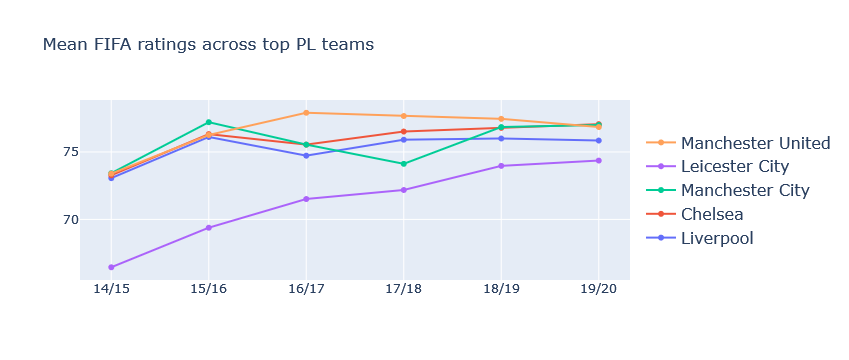

In [18]:
fig3 = go.Figure()

x = years[5:]

for i in range(5):
    fig3.add_trace(go.Scatter(x=x, y=ratings[i], name=pl_champs[i],
                    line_shape='linear'))
fig3.update_traces(hoverinfo='text+name', mode='lines+markers')
fig3.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig3.update_layout(title='Mean FIFA ratings across top PL teams')

### We can see that United never really had that much of an inferior team compared to top teams
### Especially in the 16/17 season, Manchester United had by far the highest rated team in the PL and yet they finished 6th in the league. Let's look at how the squad actually compared to the top 3 teams that season.

### However, there's definitely more to these numbers... let's look at the entire squad roster of some teams vs Man Utd.

In [19]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [20]:
mu_16_17=df17.loc[df17['club']=="Manchester United"].sort_values(by = ['overall'],ascending=False)
mu_16_17 = mu_16_17[['short_name','overall']].style.background_gradient(cmap="Reds").set_table_attributes("style='display:inline'").set_caption('16/17 Man Utd (6th) ')

mc_16_17=df17.loc[df17['club']=="Manchester City"].sort_values(by = ['overall'],ascending=False)
mc_16_17 = mc_16_17[['short_name','overall']].style.background_gradient(cmap="cool").set_table_attributes("style='display:inline'").set_caption('Man City (3rd)')

cfc_16_17=df17.loc[df17['club']=="Chelsea"].sort_values(by = ['overall'],ascending=False)
cfc_16_17 = cfc_16_17[['short_name','overall']].style.background_gradient(cmap="Blues").set_table_attributes("style='display:inline'").set_caption('Chelsea (1st)')

spurs_16_17=df17.loc[df17['club']=="Tottenham Hotspur"].sort_values(by = ['overall'],ascending=False)
spurs_16_17 = spurs_16_17[['short_name','overall']].style.background_gradient(cmap="gray").set_table_attributes("style='display:inline'").set_caption('Spurs (2nd)')

display_html(mu_16_17._repr_html_()+cfc_16_17._repr_html_()+spurs_16_17._repr_html_()+mc_16_17._repr_html_(),raw=True)

,short_name,overall
5,De Gea,90
6,Z. Ibrahimović,90
16,P. Pogba,88
81,H. Mkhitaryan,85
105,C. Smalling,84
111,W. Rooney,84
121,Juan Mata,84
153,B. Schweinsteiger,83
190,A. Martial,82
191,E. Bailly,82


### Here we can see that if we extract players by team name, there are a lot of irrelevant players that could be skewing the mean ratings.

### Just take a look at last season's Liverpool and United teams.

In [21]:
liv_19_20=df20.loc[df20['club']=="Liverpool"].sort_values(by = ['overall'],ascending=False)
liv_19_20 = liv_19_20[['short_name','overall']].style.background_gradient(cmap="Reds").set_table_attributes("style='display:inline'").set_caption('19/20 Liverpool (1st) ')

manu_19_20=df20.loc[df20['club']=="Manchester United"].sort_values(by = ['overall'],ascending=False)
manu_19_20 = manu_19_20[['short_name','overall']].style.background_gradient(cmap="Reds").set_table_attributes("style='display:inline'").set_caption('19/20 Man Utd (3rd) ')

display_html(liv_19_20._repr_html_()+manu_19_20._repr_html_(),raw=True)

,short_name,overall
7,V. van Dijk,90
9,M. Salah,90
13,Alisson,89
39,S. Mané,88
63,Roberto Firmino,86
81,Fabinho,85
82,A. Robertson,85
139,G. Wijnaldum,84
160,T. Alexander-Arnold,83
218,J. Henderson,83


### We can more clearly see the flaw in comparing teams this way in this case; coming off from the top, Liverpool has far stronger players, those who actually make the starting 11. And yet, since United has better players down below, those who aren't even registered for the team, the mean United rating turns out to be higher than that of Liverpool.

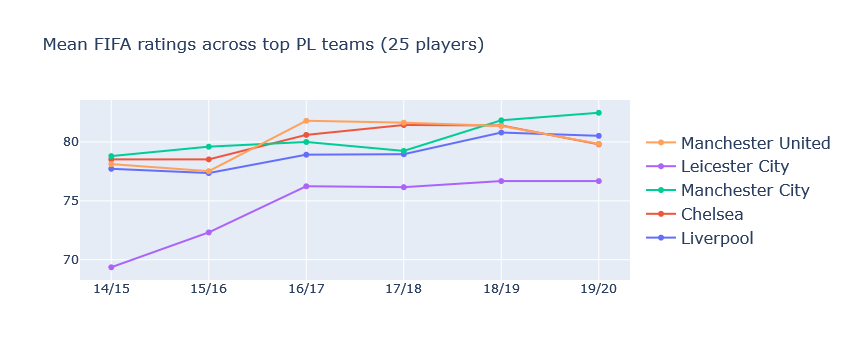

In [22]:
def champ_mean(plchamps,df,lists):
    for champ,i in zip(plchamps,range(5)):
        lists[i].append(df.loc[df['club'] == champ].sort_values(by = ['overall'],ascending=False).head(25)['overall'].mean())

ratings = [[],[],[],[],[]]

for df in dfs:
    champ_mean(pl_champs,df,ratings)
    
fig4 = go.Figure()

x = years[5:]

for i in range(5):
    fig4.add_trace(go.Scatter(x=x, y=ratings[i], name=pl_champs[i],
                    line_shape='linear'))
fig4.update_traces(hoverinfo='text+name', mode='lines+markers')
fig4.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig4.update_layout(title='Mean FIFA ratings across top PL teams (25 players)')

### Here, when we look at only 25 players (PL teams can only register 25 players; young players excluded), we can see what's really going on. Let's cut that to about 15 players.

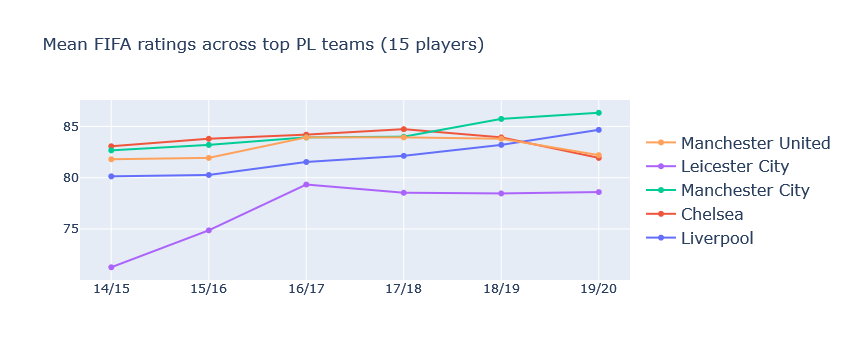

In [23]:
def champ_mean(plchamps,df,lists):
    for champ,i in zip(plchamps,range(5)):
        lists[i].append(df.loc[df['club'] == champ].sort_values(by = ['overall'],ascending=False).head(15)['overall'].mean())

ratings = [[],[],[],[],[]]

for df in dfs:
    champ_mean(pl_champs,df,ratings)
    
fig5 = go.Figure()

x = years[5:]

for i in range(5):
    fig5.add_trace(go.Scatter(x=x, y=ratings[i], name=pl_champs[i],
                    line_shape='linear'))
fig5.update_traces(hoverinfo='text+name', mode='lines+markers')
fig5.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))
fig5.update_layout(title='Mean FIFA ratings across top PL teams (15 players)')

### With 15 players, assuming the best 11 players make the starting 11 alongside about 4 players who would play as subs, we can see a better view of how good the United team has been.

### We can also see that United's ratings have been over-bloated by a lot of average yet unremarkable players: deadweight.

### We also have to consider injuries and positions; not all of the best-rated players make it to the starting lineup. For example, for more than half of the 19/20 season, United had to play Andreas Pereira and Daniel James, both of whom don't make the Top 15 players at United.